# What I leant from this project

Objectives from this project:
1. ~~Do simple EDA. No need to focus on colors and shapes right now. However, don't forget to add labels to the figure and legends whenever possible.~~
2. Add a proper problem definition.

In [1]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# 1. Problem definition



1. How does the sizes of the different species of palms vary across sub families?
2. Which fruit colors occur most often?
3. What is the distribution of the average of length and width of the fruits? (Scatter plot)

# 2. Data Collection

The dataset is from [tidytuesday repo](https://github.com/rfordatascience/tidytuesday/tree/main) on GitHub. Which is a repo that posts weekly dataset for participants to practice on and share their results on social media. The used data is posted on [2025-03-18](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-03-18/readme.md).

In [3]:
import chardet

with open('/kaggle/input/palmtrees/tidytuesday_20250318.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [4]:
original_df = pd.read_csv("/kaggle/input/palmtrees/tidytuesday_20250318.csv", encoding='Windows-1252')

In [5]:
original_df.columns

Index(['spec_name', 'acc_genus', 'acc_species', 'palm_tribe', 'palm_subfamily',
       'climbing', 'acaulescent', 'erect', 'stem_solitary', 'stem_armed',
       'leaves_armed', 'max_stem_height_m', 'max_stem_dia_cm',
       'understorey_canopy', 'max_leaf_number', 'max__blade__length_m',
       'max__rachis__length_m', 'max__petiole_length_m',
       'average_fruit_length_cm', 'min_fruit_length_cm', 'max_fruit_length_cm',
       'average_fruit_width_cm', 'min_fruit_width_cm', 'max_fruit_width_cm',
       'fruit_size_categorical', 'fruit_shape', 'fruit_color_description',
       'main_fruit_colors', 'conspicuousness'],
      dtype='object')

In [6]:
original_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,spec_name,acc_genus,acc_species,palm_tribe,palm_subfamily,climbing,acaulescent,erect,stem_solitary,stem_armed,leaves_armed,max_stem_height_m,max_stem_dia_cm,understorey_canopy,max_leaf_number,max__blade__length_m,max__rachis__length_m,max__petiole_length_m,average_fruit_length_cm,min_fruit_length_cm,max_fruit_length_cm,average_fruit_width_cm,min_fruit_width_cm,max_fruit_width_cm,fruit_size_categorical,fruit_shape,fruit_color_description,main_fruit_colors,conspicuousness
0,Acanthophoenix crinita,Acanthophoenix,crinita,Areceae,Arecoideae,climbing,acaulescent,non-erect,non-solitary,non-armed,non-armed,10.0,20.0,canopy,15.0,2.3,NaN,NaN,0.65,0.6,0.7,0.5,NaN,NaN,small,NaN,black,black,cryptic
1,Acanthophoenix rousselii,Acanthophoenix,rousselii,Areceae,Arecoideae,climbing,acaulescent,non-erect,non-solitary,non-armed,non-armed,25.0,30.0,canopy,NaN,3.0,NaN,NaN,2.00,NaN,NaN,0.8,NaN,NaN,small,ovoid,black,black,cryptic
2,Acanthophoenix rubra,Acanthophoenix,rubra,Areceae,Arecoideae,climbing,acaulescent,non-erect,non-solitary,non-armed,non-armed,15.0,18.0,canopy,20.0,3.1,3.0,NaN,1.00,NaN,NaN,0.7,NaN,NaN,small,ovoid,black,black,cryptic
3,Acoelorrhaphe wrightii,Acoelorrhaphe,wrightii,Trachycarpeae,Coryphoideae,climbing,acaulescent,non-erect,solitary,armed,non-armed,9.1,15.0,canopy,25.0,1.3,0.7,0.65,0.70,NaN,NaN,0.7,0.5,0.9,small,ovoid,orange-brown; becomming black,brown; black,cryptic
4,Acrocomia aculeata,Acrocomia,aculeata,Cocoseae,Arecoideae,climbing,acaulescent,non-erect,non-solitary,non-armed,non-armed,12.0,50.0,canopy,30.0,3.5,2.5,NaN,4.25,3.5,5.0,4.6,3.8,5.4,large,ovoid,yellowish green,green,cryptic


In [7]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   spec_name                2557 non-null   object 
 1   acc_genus                2557 non-null   object 
 2   acc_species              2557 non-null   object 
 3   palm_tribe               2557 non-null   object 
 4   palm_subfamily           2557 non-null   object 
 5   climbing                 2557 non-null   object 
 6   acaulescent              2557 non-null   object 
 7   erect                    2557 non-null   object 
 8   stem_solitary            2182 non-null   object 
 9   stem_armed               2502 non-null   object 
 10  leaves_armed             2437 non-null   object 
 11  max_stem_height_m        2111 non-null   float64
 12  max_stem_dia_cm          1955 non-null   float64
 13  understorey_canopy       2292 non-null   object 
 14  max_leaf_number         

In [8]:
original_df.isna().sum()

spec_name                     0
acc_genus                     0
acc_species                   0
palm_tribe                    0
palm_subfamily                0
climbing                      0
acaulescent                   0
erect                         0
stem_solitary               375
stem_armed                   55
leaves_armed                120
max_stem_height_m           446
max_stem_dia_cm             602
understorey_canopy          265
max_leaf_number            1251
max__blade__length_m        659
max__rachis__length_m      1026
max__petiole_length_m      1347
average_fruit_length_cm     505
min_fruit_length_cm        1651
max_fruit_length_cm        1641
average_fruit_width_cm      563
min_fruit_width_cm         1563
max_fruit_width_cm         1555
fruit_size_categorical      505
fruit_shape                 765
fruit_color_description     709
main_fruit_colors           758
conspicuousness             758
dtype: int64

In [9]:
# Class for all 'object' features
object_features = original_df.select_dtypes(include="object")
for feature in object_features.columns:
    nunique = original_df[feature].nunique()
    print(f"There are {nunique} unique values in {feature}")
    if nunique < 50:
        print(original_df[feature].value_counts())
    print("-----------------------------")

There are 2557 unique values in spec_name
-----------------------------
There are 185 unique values in acc_genus
-----------------------------
There are 1977 unique values in acc_species
-----------------------------
There are 29 unique values in palm_tribe
palm_tribe
Areceae             689
Calameae            576
Cocoseae            348
Trachycarpeae       307
Chamaedoreeae       117
Geonomateae         102
Cryosophileae        80
Lepidocaryeae        49
Caryoteae            46
Ceroxyleae           34
Euterpeae            33
Irarteeae            31
Oranieae             28
Borasseae            22
Sabaleae             15
Corypheae            14
Phoeniceae           14
Roystoneeae          10
Phytelepheae          8
Chuniophoeniceae      6
Eugeissoneae          6
Reinhardtieae         6
Cyclosphatheae        4
Sclerospermeae        3
Podococceae           2
Pelagodoxeae          2
Leopoldinieae         2
Manicarieae           2
Nypoideae             1
Name: count, dtype: int64
---------

# 3. Data Preprocessing

From the first glance at the dataframe's info:
1. There are a lot of missing average fruit length and width, while the max and min of the length and width are almost half of the average. We may be able to decrease in the number of missing values in both averages by calculting it from the min and max, if they exist in the first place.

## 1. Missing Values

In [10]:
df_missing_values = original_df.copy()

In [11]:
# How many missing values in 'average_fruit_length_cm'
missing_average_length = df_missing_values[df_missing_values["average_fruit_length_cm"].isna()]
missing_average_length.shape

(505, 29)

In [12]:
# How many of which have both 'min_fruit_length_cm' and 'max_fruit_length_cm' avilable
both_lengths_avilable = missing_average_length[(missing_average_length['min_fruit_length_cm'].notna()) & (missing_average_length['max_fruit_length_cm'].notna())]
both_lengths_avilable.head()

,spec_name,acc_genus,acc_species,palm_tribe,palm_subfamily,climbing,acaulescent,erect,stem_solitary,stem_armed,leaves_armed,max_stem_height_m,max_stem_dia_cm,understorey_canopy,max_leaf_number,max__blade__length_m,max__rachis__length_m,max__petiole_length_m,average_fruit_length_cm,min_fruit_length_cm,max_fruit_length_cm,average_fruit_width_cm,min_fruit_width_cm,max_fruit_width_cm,fruit_size_categorical,fruit_shape,fruit_color_description,main_fruit_colors,conspicuousness


We found that all the records with missing `average_fruit_length_cm` is also missing `min_fruit_length_cm` and `max_fruit_length_cm`. We could've found that by quickly looking at the `missing_average_length.info()`.

This explains 505 of `min_fruit_length_cm` and `max_fruit_length_cm`. But still remains 1,146 and 1,136 missing for `min_fruit_length_cm` and `max_fruit_length_cm` values respectively.

## 2. Decode Multi-label Features

There are two features that can contains more than one value per record.

Solutions:
1. Create a binary column for each value.
    * This is a good idea. But, we need to check how many unique values are in the column first. If the column contains too many values, it would not be a good to convert it.
2. Use sk-learn's `MultiLabelBinarizer`.

In [13]:
df_multi_label = df_missing_values.copy()

In [14]:
df_multi_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   spec_name                2557 non-null   object 
 1   acc_genus                2557 non-null   object 
 2   acc_species              2557 non-null   object 
 3   palm_tribe               2557 non-null   object 
 4   palm_subfamily           2557 non-null   object 
 5   climbing                 2557 non-null   object 
 6   acaulescent              2557 non-null   object 
 7   erect                    2557 non-null   object 
 8   stem_solitary            2182 non-null   object 
 9   stem_armed               2502 non-null   object 
 10  leaves_armed             2437 non-null   object 
 11  max_stem_height_m        2111 non-null   float64
 12  max_stem_dia_cm          1955 non-null   float64
 13  understorey_canopy       2292 non-null   object 
 14  max_leaf_number         

In [15]:
df_multi_label["fruit_color_description"].value_counts()

fruit_color_description
black                                                                                 160
red                                                                                   147
brown                                                                                  72
purple-black                                                                           67
orange                                                                                 51
                                                                                     ... 
greenish-brown at maturity                                                              1
red to orange-red; bluish green; often becomming dull orange just before droppping      1
orange ripening black                                                                   1
black; glossy                                                                           1
green to brown; green                                                       

In [16]:
df_multi_label.loc[df_multi_label["fruit_color_description"].str.split(';').str.len() > 1, "fruit_color_description"]

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


3                           orange-brown; becomming black
26      red with black apex; becomming brown or shiny ...
29         red or less often purple or white; pinkish red
30      bright red; rarely orange or white; with orang...
42                  reddish-brown; speckled brown and red
                              ...                        
2532                     brownish when dry; reddish brown
2534                              brownish yellow; yellow
2549                                   light brown; brown
2552                                    dark brown; green
2554                                green to brown; green
Name: fruit_color_description, Length: 284, dtype: object

Look like the `fruit_color_descritpion` feature cannot be converted because of its nature. In case we needed that column for classification purpose, we can dop the records with more than a single value.

Since we are not planning to create a classfication model, we can leave it as is for now.

In [17]:
df_multi_label["main_fruit_colors"].value_counts()

main_fruit_colors
brown                    324
red                      256
black                    228
green                    106
yellow                   105
                        ... 
straw-coloured; green      1
white; yellow              1
cream                      1
cream; yellow              1
brown; pink                1
Name: count, Length: 147, dtype: int64

In [18]:
main_fruit_colors_lengths = df_multi_label["main_fruit_colors"].str.split(';').str.len()

In [19]:
# Size
for size in range(1, 5):
    print(f"Number of records with more than {size} values: ", end="")
    print(df_multi_label.loc[main_fruit_colors_lengths > size, "main_fruit_colors"].shape)

Number of records with more than 1 values: (581,)
Number of records with more than 2 values: (91,)
Number of records with more than 3 values: (10,)
Number of records with more than 4 values: (1,)


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


We only have 10 records with 4 or 5 valus. We can dop those 10 records in order to avoid creating two extra column, mostly filled by zeros.

In [20]:
df_multi_label.shape

(2557, 29)

In [21]:
df_multi_label.drop(df_multi_label[main_fruit_colors_lengths > 3].index, axis=0, inplace=True)

In [22]:
df_multi_label.shape

(2547, 29)

In [23]:
# Count all the unique values in the entire column, after unpacking records with multiple values
unique_fruit_colors_unpacked = (
    df_multi_label["main_fruit_colors"]
    .str.split('; ')
    .explode()
    .dropna()
    .unique()
)
unique_fruit_colors_unpacked, len(unique_fruit_colors_unpacked)

(array(['black', 'brown', 'green', 'yellow', 'orange', 'red', 'purple',
        'white', 'pink', 'blue', 'straw-coloured', 'ivory', 'cream',
        'grey'], dtype=object),
 14)

In [24]:
# Does the single_values in the `main_fruit_colors` have the same number of unique values?
unique_fruit_colors_packed = df_multi_label.loc[main_fruit_colors_lengths == 1, "main_fruit_colors"].unique()
np.sort(unique_fruit_colors_packed), len(unique_fruit_colors_packed)

(array(['black', 'blue', 'brown', 'cream', 'green', 'grey', 'ivory',
        'orange', 'pink', 'purple', 'red', 'straw-coloured', 'white',
        'yellow'], dtype=object),
 14)

The answer is yes. Records with more than a single value doesn't contain unique colors.

In [25]:
# Using One-Hot Encoder to decode the column into 14 different columns
unique_fruit_colors_decoded = df_multi_label["main_fruit_colors"].str.get_dummies(sep='; ').astype(bool)
unique_fruit_colors_decoded

,black,blue,brown,cream,green,grey,ivory,orange,pink,purple,red,straw-coloured,white,yellow
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,False,False,True,False,True,False,False,False,False,False,False,False,False,False
2553,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2554,False,False,True,False,True,False,False,False,False,False,False,False,False,False
2555,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [26]:
unique_fruit_colors_decoded = unique_fruit_colors_decoded.rename(
    columns = {color: ("main_fruit_colors_" + color) for color in unique_fruit_colors_decoded.columns}
)

In [27]:
df_multi_label.drop("main_fruit_colors", axis=1, inplace=True)

In [28]:
df_multi_label = pd.concat([df_multi_label, unique_fruit_colors_decoded], axis=1)

In [29]:
df_multi_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2547 entries, 0 to 2556
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   spec_name                         2547 non-null   object 
 1   acc_genus                         2547 non-null   object 
 2   acc_species                       2547 non-null   object 
 3   palm_tribe                        2547 non-null   object 
 4   palm_subfamily                    2547 non-null   object 
 5   climbing                          2547 non-null   object 
 6   acaulescent                       2547 non-null   object 
 7   erect                             2547 non-null   object 
 8   stem_solitary                     2173 non-null   object 
 9   stem_armed                        2492 non-null   object 
 10  leaves_armed                      2427 non-null   object 
 11  max_stem_height_m                 2101 non-null   float64
 12  max_stem_di

## 3. Correcting Data Types

In [30]:
df_correcting_dtypes = df_multi_label.copy()

In [31]:
df_correcting_dtypes = df_correcting_dtypes.convert_dtypes()

In [32]:
df_correcting_dtypes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2547 entries, 0 to 2556
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   spec_name                         2547 non-null   string 
 1   acc_genus                         2547 non-null   string 
 2   acc_species                       2547 non-null   string 
 3   palm_tribe                        2547 non-null   string 
 4   palm_subfamily                    2547 non-null   string 
 5   climbing                          2547 non-null   string 
 6   acaulescent                       2547 non-null   string 
 7   erect                             2547 non-null   string 
 8   stem_solitary                     2173 non-null   string 
 9   stem_armed                        2492 non-null   string 
 10  leaves_armed                      2427 non-null   string 
 11  max_stem_height_m                 2101 non-null   Float64
 12  max_stem_di

In [33]:
float_features = df_correcting_dtypes.select_dtypes(include="Float64")
float_features.columns

Index(['max_stem_height_m', 'max_stem_dia_cm', 'max__blade__length_m',
       'max__rachis__length_m', 'max__petiole_length_m',
       'average_fruit_length_cm', 'min_fruit_length_cm', 'max_fruit_length_cm',
       'average_fruit_width_cm', 'min_fruit_width_cm', 'max_fruit_width_cm'],
      dtype='object')

In [34]:
for feature in float_features.columns:
    print(f"For {feature} the max is {float_features[feature].max()} and the min is {float_features[feature].min()}")
    print("-----------------")

For max_stem_height_m the max is 170.0 and the min is 0.0
-----------------
For max_stem_dia_cm the max is 175.0 and the min is 0.0
-----------------
For max__blade__length_m the max is 25.0 and the min is 0.15
-----------------
For max__rachis__length_m the max is 18.5 and the min is 0.05
-----------------
For max__petiole_length_m the max is 6.75 and the min is 0.0
-----------------
For average_fruit_length_cm the max is 45.0 and the min is 0.3
-----------------
For min_fruit_length_cm the max is 40.0 and the min is 0.3
-----------------
For max_fruit_length_cm the max is 50.0 and the min is 0.5
-----------------
For average_fruit_width_cm the max is 20.0 and the min is 0.2
-----------------
For min_fruit_width_cm the max is 13.0 and the min is 0.2
-----------------
For max_fruit_width_cm the max is 20.0 and the min is 0.22
-----------------


In [35]:
int_features = df_correcting_dtypes.select_dtypes(include="Int64")
int_features.columns

Index(['max_leaf_number'], dtype='object')

In [36]:
for feature in int_features.columns:
    print(f"For {feature} the max is {int_features[feature].max()} and the min is {int_features[feature].min()}")
    print("-----------------")

For max_leaf_number the max is 75 and the min is 4
-----------------


In [37]:
for feature in float_features.columns:
    df_correcting_dtypes[feature] = df_correcting_dtypes[feature].astype(np.float16)

In [38]:
for feature in int_features.columns:
    df_correcting_dtypes[feature] = df_correcting_dtypes[feature].astype("Int8")

After having a deeper look, all the float and int features can be converted to `Float16` and `Int8` respectivley. This is done in order to save memory and make it faster for the ML model to train on.

Unfourtnetly, converting from `Int64` to numpy's `int8` is not possible because of the NA values. Our soultions are
1. Convert it to pandas' `Int8` (didn't even know pandas had this dtype, tbh)
2. Convert it to `np.float16` instead to keep the missing values.
3. Drop the missing values before converting
4. Simply, leave it as is.

I chose the third option since it's only one feature that's affected by this.

In [39]:
df_correcting_dtypes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2547 entries, 0 to 2556
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   spec_name                         2547 non-null   string 
 1   acc_genus                         2547 non-null   string 
 2   acc_species                       2547 non-null   string 
 3   palm_tribe                        2547 non-null   string 
 4   palm_subfamily                    2547 non-null   string 
 5   climbing                          2547 non-null   string 
 6   acaulescent                       2547 non-null   string 
 7   erect                             2547 non-null   string 
 8   stem_solitary                     2173 non-null   string 
 9   stem_armed                        2492 non-null   string 
 10  leaves_armed                      2427 non-null   string 
 11  max_stem_height_m                 2101 non-null   float16
 12  max_stem_di

# 4. EDA

In [40]:
df_eda = df_correcting_dtypes.copy()

## 1. How does the sizes of the different species of palms vary across sub families?

## 2. Which fruit colors occur most often?

Improvements:
1. ~~Color each bar with the color it represents~~
2. ~~Rotate the labels for better readability~~

In [69]:
# Count the sum of each color column from `main_fruit_colors`
colors_sum = df_eda.select_dtypes(include="boolean").sum().sort_values(ascending=False)
colors_sum

main_fruit_colors_red               493
main_fruit_colors_brown             481
main_fruit_colors_black             455
main_fruit_colors_orange            259
main_fruit_colors_yellow            204
main_fruit_colors_green             191
main_fruit_colors_purple            170
main_fruit_colors_white              86
main_fruit_colors_pink               34
main_fruit_colors_straw-coloured     22
main_fruit_colors_blue               17
main_fruit_colors_cream              11
main_fruit_colors_grey                9
main_fruit_colors_ivory               9
dtype: Int64

In [172]:
df_colors_sum["colors"].str.split('_').str[-1]

0                red
1              brown
2              black
3             orange
4             yellow
5              green
6             purple
7              white
8               pink
9     straw-coloured
10              blue
11             cream
12              grey
13             ivory
Name: colors, dtype: object

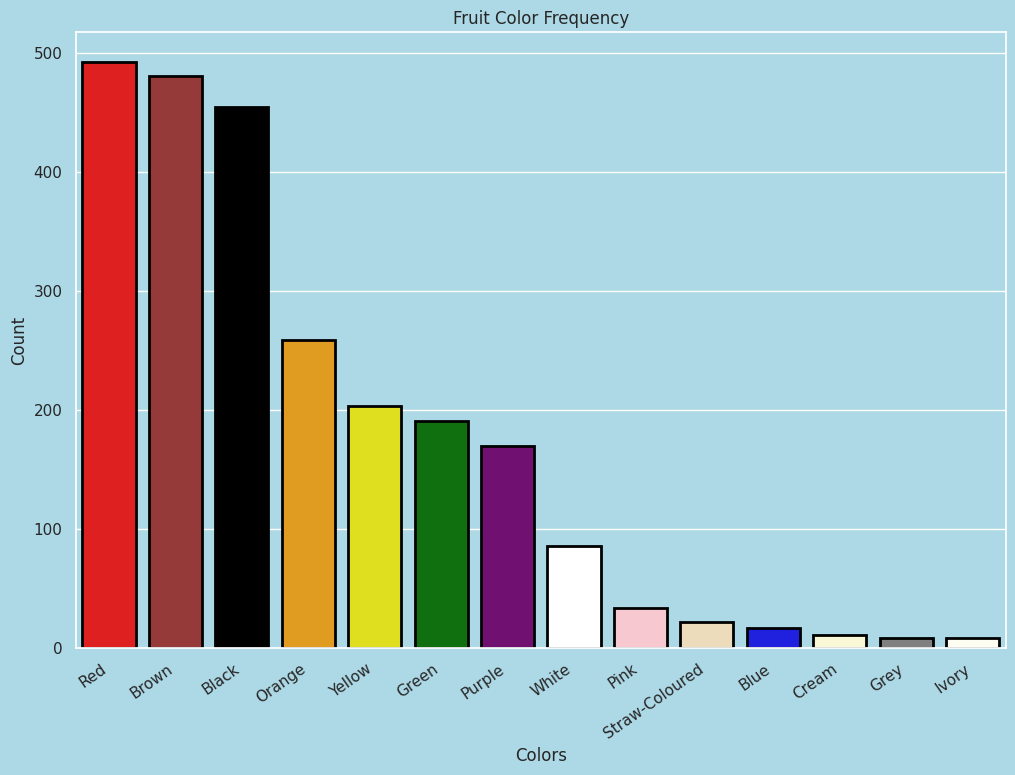

In [184]:
color_palette = ['#FF0000', '#A52A2A', '#000000', '#FFA500', '#FFFF00', '#008000', '#800080', '#FFFFFF', '#FFC0CB', '#F5DEB3', '#0000FF', '#FFFDD0', '#808080', '#FFFFF0']

df_colors_sum = pd.DataFrame({"colors": colors_sum.index, "count": colors_sum.values})

sns.set(
    rc={
        'axes.facecolor':'lightblue', 
        'figure.facecolor':'lightblue',
    }
)
plt.figure(figsize=(12, 8))

ax = sns.barplot(
    data=df_colors_sum,
    x="colors",
    y="count",
    palette=color_palette,
    edgecolor="black",
    linewidth=2,
)

# Split on '_', access the last element in the array, use the title style to capitalize the first letter
ax.set_xticklabels(df_colors_sum["colors"].str.split('_').str[-1].str.title())
plt.xticks(rotation=35, ha="right")

plt.title('Fruit Color Frequency')
plt.xlabel('Colors')
plt.ylabel('Count')

plt.show()

## 3. What is the distribution of the average of length and width of the fruits? 

Improvements:
1. ~~Add the average of each subfamily as an 'x' with the color corresponding the class color~~
2. ~~Change the title of the Legend~~

In [155]:
mean_df = df_eda.groupby("palm_subfamily", as_index=False).agg({
    'average_fruit_length_cm': 'mean',
    'average_fruit_width_cm': 'mean',
})
mean_df

,palm_subfamily,average_fruit_length_cm,average_fruit_width_cm
0,Arecoideae,2.151671,1.451177
1,Calamoideae,2.156624,1.642155
2,Ceroxyloideae,2.844145,2.828760
3,Coryphoideae,2.295975,1.836671
4,Nypoideae,11.500000,6.000000


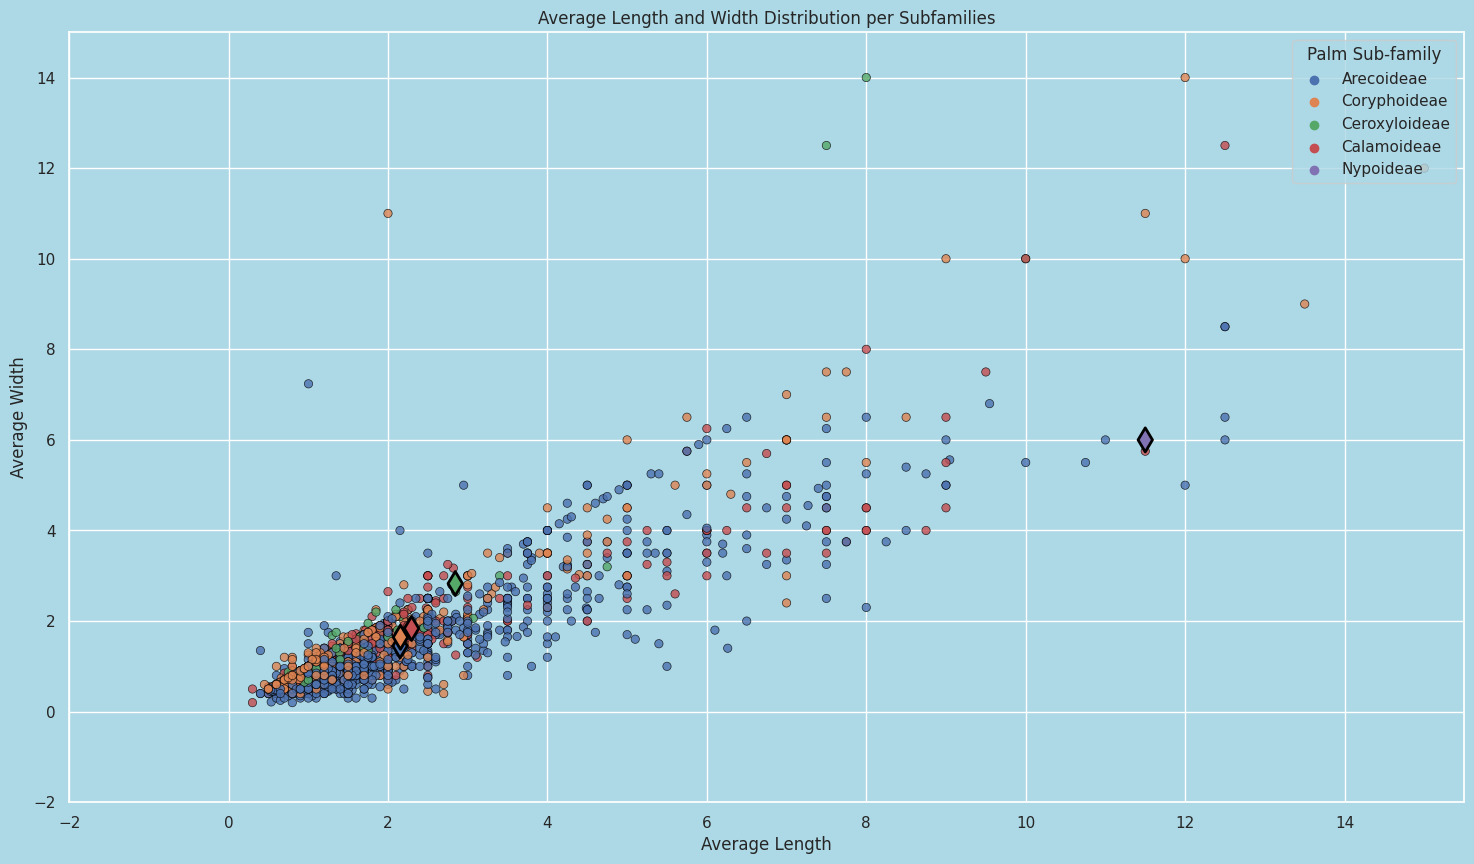

In [164]:
plt.figure(figsize=(18, 10))

scatter = sns.scatterplot(
    data=df_eda,
    x="average_fruit_length_cm",
    y="average_fruit_width_cm",
    hue="palm_subfamily",
    edgecolor="black",
    alpha=0.8
)

sns.scatterplot(
    data=mean_df,
    x="average_fruit_length_cm",
    y="average_fruit_width_cm",
    hue="palm_subfamily", 
    marker='d',
    s=150, 
    linewidth=2,
    edgecolor="black",
    legend=False,
    ax=scatter.axes
)


# Limiting the x and y axis to spread out the data for readability
plt.xlim(-2, 15.5)
plt.ylim(-2, 15)

plt.legend(title="Palm Sub-family", loc="upper right")

plt.title('Average Length and Width Distribution per Subfamilies')
plt.xlabel('Average Length')
plt.ylabel('Average Width')

plt.show()